In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imageZoom(im,scale): # zooms the image by scale times
    """Zooms the RGB image"""
    blue_im = im[:,:,0]
    red_im = im[:,:,1]
    green_im = im[:,:,2]
    row, col, dim = im.shape
    zoomed_blue = zoom(blue_im,scale)
    zoomed_red = zoom(red_im,scale)
    zoomed_green = zoom(green_im,scale)
    zoomedImage = np.array([[[zoomed_blue[i,j],zoomed_red[i,j],zoomed_green[i][j]]for j in range(col)]for i in range(row)])
    return zoomedImage

In [3]:
def zoom(image,scale): #helper function to zoom the pixels of each color
    row , column = image.shape
    imageList = image.tolist()
    r = rowOperation(imageList,0,scale)
    i = 0
    while(i  <  len(imageList)-1):
        rowOperation(imageList,i+1,scale)
        colOperation(imageList,i,scale)
        i = i+scale
    midRow = ((scale*(row-1))+1)//2
    midCol =((scale*(column-1))+1)//2
    startRow = midRow - (row//2)
    endRow = startRow + row
    startCol = midCol - (column//2)
    endCol = startCol + column
    newImage = np.array(imageList,dtype=np.uint8)
    return newImage[startRow:endRow,startCol:endCol]

In [4]:
def rowOperation(img,index,scale): #perform row operation on "index" row of the list of list "img"
    ind = 0
    while(ind < len(img[index])-1):
        p1 = img[index][ind]
        p2 = img[index][ind+1]
        if( p1 < p2):
            smaller = p1
            larger = p2
        else:
            smaller = p2 
            larger = p1
        OP = (larger - smaller) // scale
        T = smaller + OP
        for i in range(scale - 1):
            ind = ind +1
            img[index].insert(ind,T)
            T = T + OP
        ind = ind + 1;

In [5]:
def colOperation(img,index,scale): #perform column operation between "index" and "index+1" columns of the list of list "img"
    T = []
    OP_List = []
    l1 = img[index]
    l2 = img[index + 1]
    ind = 0
    while ( ind < len(img[index])):
        Q1 = img[index][ind]
        Q2 = img[index+1][ind]
        if(Q1 < Q2):
            smaller = Q1
            larger = Q2
        else:
            smaller = Q2
            larger = Q1
        OP = (larger - smaller) // scale
        OP_List.append(OP)
        T.append(smaller + OP)
        ind = ind + 1
    
    T_array = np.array(T)
    OP_array = np.array(T)
    
    for i in range( scale - 1 ):
        img.insert(index+1,T_array.tolist())
        T_array = T_array + OP_array

In [6]:
#import the image
ImageFilename = input("Enter image path")
image = plt.imread(ImageFilename)
k = int(input("Enter zooming factor")) #zooming factor

Enter image pathDogs.jpg
Enter zooming factor2


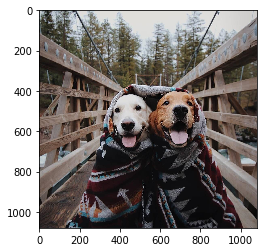

In [7]:
#show original image
plt.imshow(image)
plt.show()

In [8]:
#Zoom the image by k times
newImage = imageZoom(image,k)

In [9]:
#shape of the zoomed image
newImage.shape

(1080, 1080, 3)

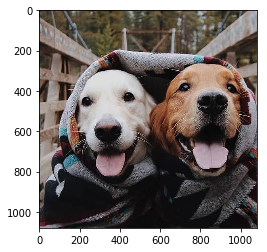

In [10]:
#show the new zoomed image
plt.imshow(newImage)
plt.show()

In [11]:
#save the zoomed image
newFilename = input("Enter the filename to save the zoomed Image")

plt.imsave(newFilename,newImage)


Enter the filename to save the zoomed Imagedogsby2times.jpg
